# Import Packages

In [37]:

import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tqdm import tqdm
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
class_names = ['tumor', 'normal', ]
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (150, 150)

# Loading the Data
We have to write a load_data function that load the images and the labels from the folder.

In [3]:
def load_data():

    datasets = ["C:/Users/saipa/Music/updated braintumor NEC/train", 'C:/Users/saipa/Music/updated braintumor NEC/test']

    output = []

    # Iterate through training and test sets
    for dataset in datasets:

        images = []
        labels = []

        print("Loading {}".format(dataset))

        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]

            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):

                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)

                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE)

                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)

        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')

        output.append((images, labels))

    return output

In [4]:
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading C:/Users/saipa/Music/updated braintumor NEC/train


100%|███████████████████████████████████████████████████████████████████████████████| 826/826 [00:06<00:00, 135.26it/s]


Loading C:/Users/saipa/Music/updated braintumor NEC/test


100%|███████████████████████████████████████████████████████████████████████████████| 826/826 [00:05<00:00, 140.86it/s]


In [5]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

In [6]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 1221
Number of testing examples: 1221
Each image is of size: (150, 150)


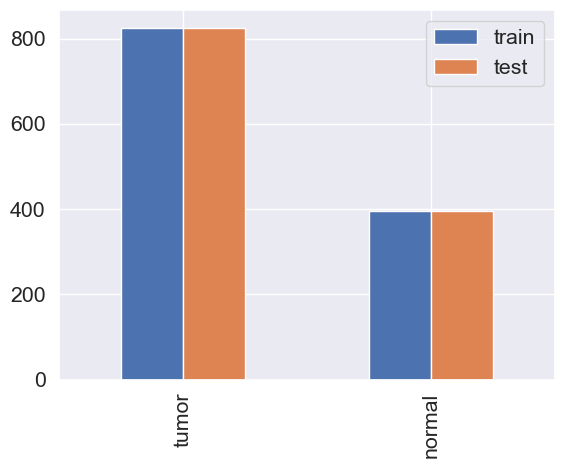

In [7]:
import pandas as pd

_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)
pd.DataFrame({'train': train_counts,
                    'test': test_counts},
             index=class_names
            ).plot.bar()
plt.show()

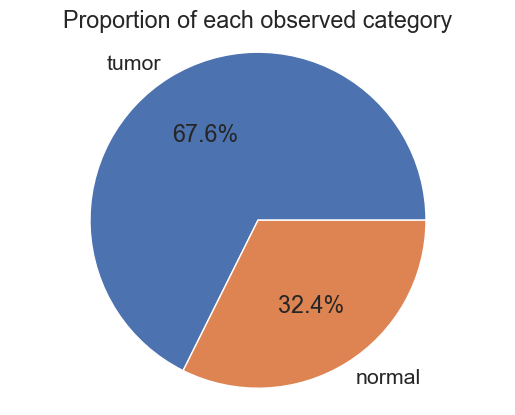

In [8]:
plt.pie(train_counts,
        explode=(0, 0) ,
        labels=class_names,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each observed category')
plt.show()

## Good practice: scale the data

In [9]:
train_images = train_images / 255.0
test_images = test_images / 255.0

## Visualize the data
We can display a random image from the training set.

In [10]:
def display_random_image(class_names, images, labels):


    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()

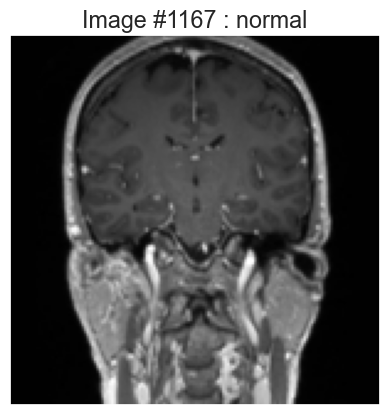

In [11]:
display_random_image(class_names, train_images, train_labels)

In [12]:
def display_examples(class_names, images, labels):
    """
        Display 25 images from the images array with its corresponding labels
    """

    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

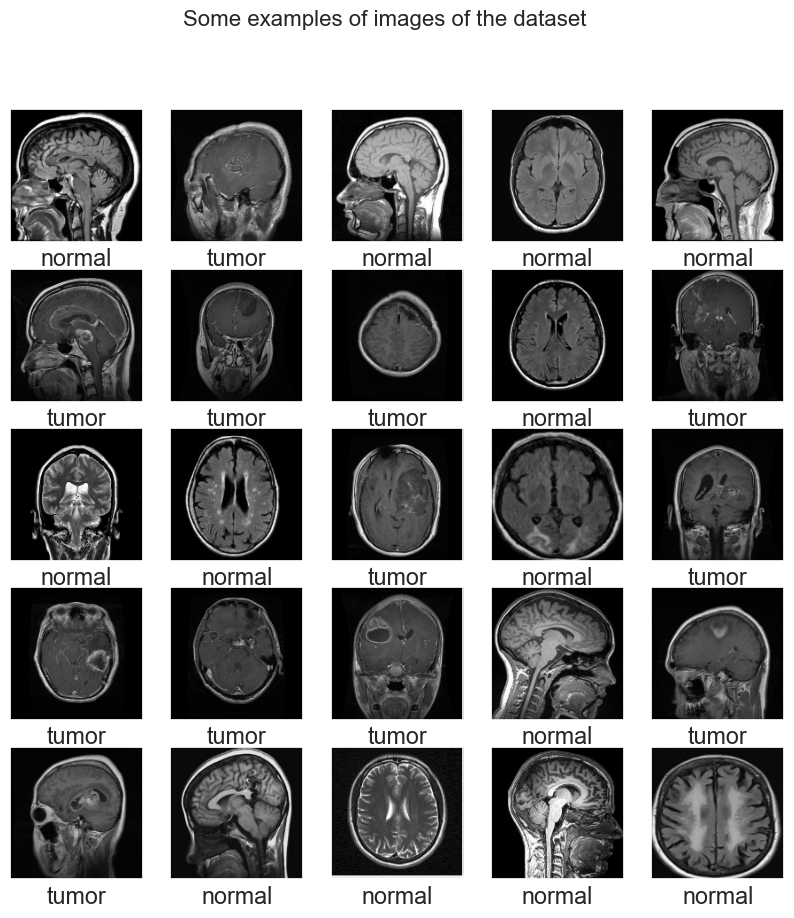

In [13]:
display_examples(class_names, train_images, train_labels)

# VGG16 MODEL

In [14]:
from tensorflow.keras.activations import relu, softmax

# Define your model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=relu),
    tf.keras.layers.Dense(4, activation=softmax)
])


C:\Users\saipa\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [15]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 41472)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       5,308,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,319,204 (20.29 MB)

 Trainable params: 5,319,204 (20.29 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=8, validation_split = 0.2)

Epoch 1/8
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 897ms/step - accuracy: 0.4599 - loss: 0.9977 - val_accuracy: 0.8041 - val_loss: 0.4294
Epoch 2/8
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 778ms/step - accuracy: 0.8443 - loss: 0.3895 - val_accuracy: 0.9102 - val_loss: 0.2258
Epoch 3/8
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 807ms/step - accuracy: 0.9440 - loss: 0.1720 - val_accuracy: 0.9633 - val_loss: 0.1391
Epoch 4/8
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 772ms/step - accuracy: 0.9593 - loss: 0.1174 - val_accuracy: 0.9755 - val_loss: 0.0902
Epoch 5/8
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 751ms/step - accuracy: 0.9856 - loss: 0.0571 - val_accuracy: 0.9837 - val_loss: 0.0640
Epoch 6/8
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 768ms/step - accuracy: 0.9886 - loss: 0.0473 - val_accuracy: 0.9837 - val_loss: 0.0702
Epoch 7/8
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 751ms/step - accuracy: 0.9957 - loss: 0.0177 - val_accuracy: 0.9878 - val_loss: 0.0592
Epoch 8/8
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 746ms/step - accuracy: 0.9922 - loss: 0.0200 - val_accuracy: 0.9837 - val_loss: 0.0722

In [18]:
test_loss = model.evaluate(test_images, test_labels)

39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.9882 - loss: 0.0424


# CNN MODEL

In [35]:
batch_size =55
epochs = 5
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [38]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
test_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [39]:
total_train_tumor = len(os.listdir('C:/Users/saipa/Music/updated braintumor NEC/train/tumor'))
total_train_normal = len(os.listdir('C:/Users/saipa/Music/updated braintumor NEC/train/normal'))
total_test_tumor = len(os.listdir('C:/Users/saipa/Music/updated braintumor NEC/test/tumor'))
total_test_normal = len(os.listdir('C:/Users/saipa/Music/updated braintumor NEC/test/normal'))

train_dir = os.path.join('C:/Users/saipa/Music/updated braintumor NEC/datasets')
test_dir = os.path.join('C:/Users/saipa/Music/updated braintumor NEC/datasets')


total_train = total_train_tumor + total_train_normal
total_test = total_test_tumor + total_test_normal

In [40]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 1463 images belonging to 2 classes.


In [41]:
test_data_gen = test_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=test_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 1463 images belonging to 2 classes.


In [42]:
model = Sequential([
    Conv2D(32, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(2, 2),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)

])

C:\Users\saipa\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [43]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [44]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 150, 150, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 75, 75, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 37, 37, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 18, 18, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 41472)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │      21,234,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,327,937 (81.36 MB)

 Trainable params: 21,327,937 (81.36 MB)

 Non-trainable params: 0 (0.00 B)

In [45]:
history = model.fit(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=8,
    validation_data=test_data_gen,
    validation_steps=total_test // batch_size
)


Epoch 1/8


C:\Users\saipa\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


22/22 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.6624 - loss: 0.8841 - val_accuracy: 0.7678 - val_loss: 0.4665
Epoch 2/8
 5/22 ━━━━━━━━━━━━━━━━━━━━ 15s 912ms/step - accuracy: 0.7612 - loss: 0.4615

C:\Users\saipa\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 239ms/step - accuracy: 0.7631 - loss: 0.4089 - val_accuracy: 0.7826 - val_loss: 0.4010
Epoch 3/8
22/22 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.7847 - loss: 0.4180 - val_accuracy: 0.8587 - val_loss: 0.2904
Epoch 4/8
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 234ms/step - accuracy: 0.8541 - loss: 0.2625 - val_accuracy: 0.8458 - val_loss: 0.2723
Epoch 5/8
22/22 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.8734 - loss: 0.2910 - val_accuracy: 0.9008 - val_loss: 0.1899
Epoch 6/8
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 234ms/step - accuracy: 0.9260 - loss: 0.1657 - val_accuracy: 0.9012 - val_loss: 0.1686
Epoch 7/8
22/22 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.9124 - loss: 0.1794 - val_accuracy: 0.9587 - val_loss: 0.1071
Epoch 8/8
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 240ms/step - accuracy: 0.9397 - loss: 0.1950 - val_accuracy: 0.9723 - val_loss: 0.0943


In [19]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "accuracy")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_accuracy")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

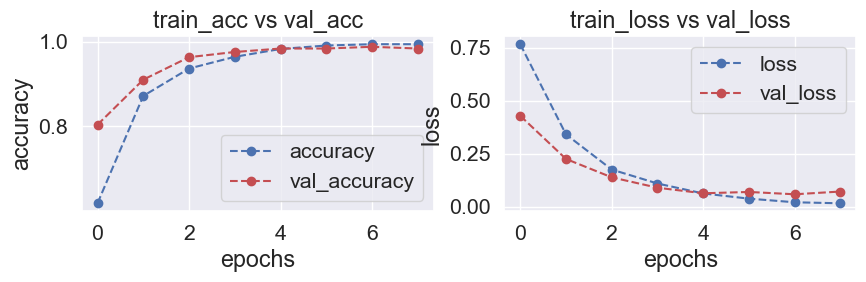

In [20]:
plot_accuracy_loss(history)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
[1]


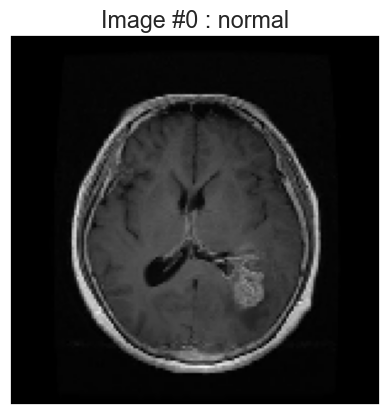

In [21]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing import image
test_image = image.load_img('C:/Users/saipa/Music/updated braintumor NEC/test/tumor/gg (10).jpg', target_size = (150, 150))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
predictions = model.predict(test_image)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability
print(pred_labels )

index = np.random.randint(test_image.shape[0])
plt.figure()
plt.imshow(test_image[index].astype('uint8'))
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.title('Image #{} : '.format(index) + class_names[pred_labels[index]])
plt.show()

39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step


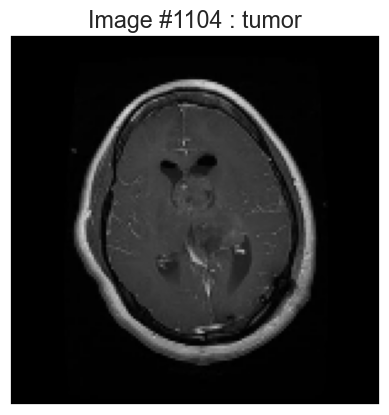

In [22]:
predictions = model.predict(test_images)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability

display_random_image(class_names, test_images, pred_labels)

In [23]:
def display_examples(class_names, images, labels):
    """
        Display 25 images from the images array with its corresponding labels
    """

    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

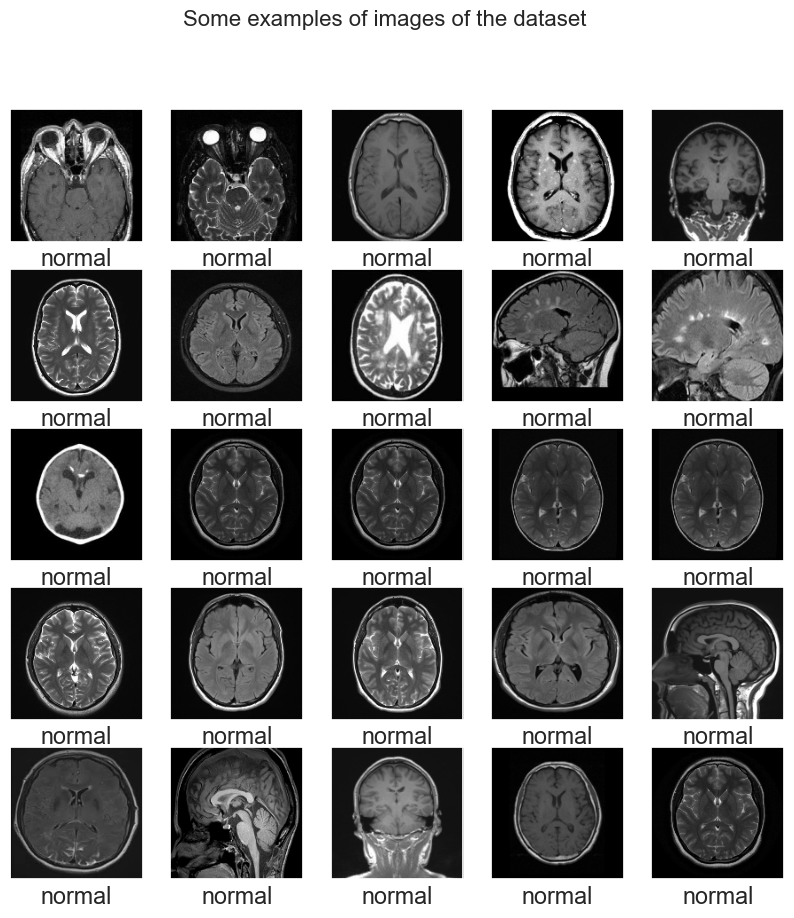

In [24]:
display_examples(class_names, test_images,test_labels)

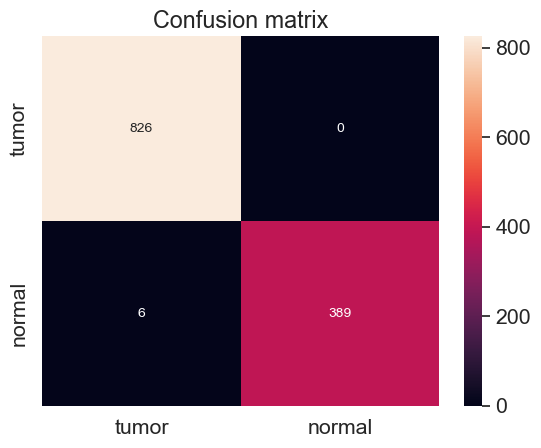

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
CM = confusion_matrix(test_labels, pred_labels)

# Plot confusion matrix
ax = plt.axes()
sns.heatmap(CM, annot=True, fmt='d',
            annot_kws={"size": 10},
            xticklabels=class_names,
            yticklabels=class_names, ax=ax)
ax.set_title('Confusion matrix')
plt.show()


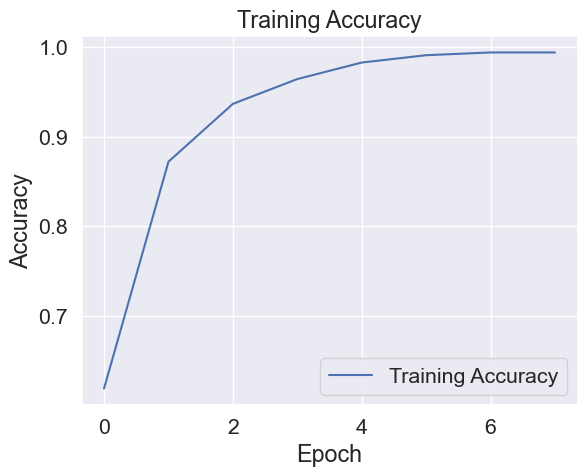

Final Training Accuracy: 99.39%


In [26]:
import matplotlib.pyplot as plt

# Plot training accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Print training accuracy values
final_training_accuracy = history.history['accuracy'][-1] * 100
print("Final Training Accuracy: %.2f%%" % final_training_accuracy)


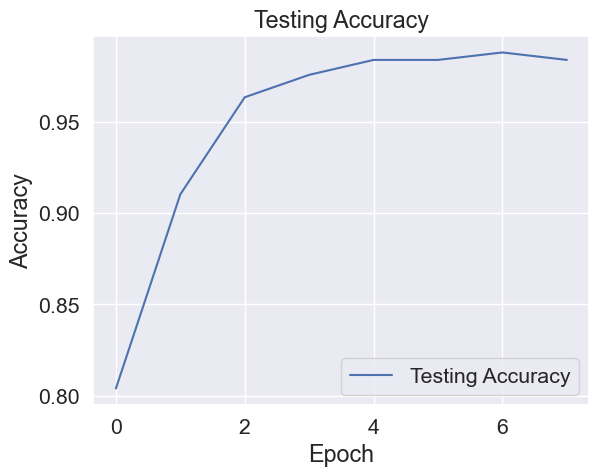

Final Testing Accuracy: 98.37%


In [27]:
import matplotlib.pyplot as plt

# Plot validation accuracy
plt.plot(history.history['val_accuracy'], label='Testing Accuracy')
plt.title('Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Print final validation accuracy value
final_validation_accuracy = history.history['val_accuracy'][-1] * 100
print("Final Testing Accuracy: %.2f%%" % final_validation_accuracy)

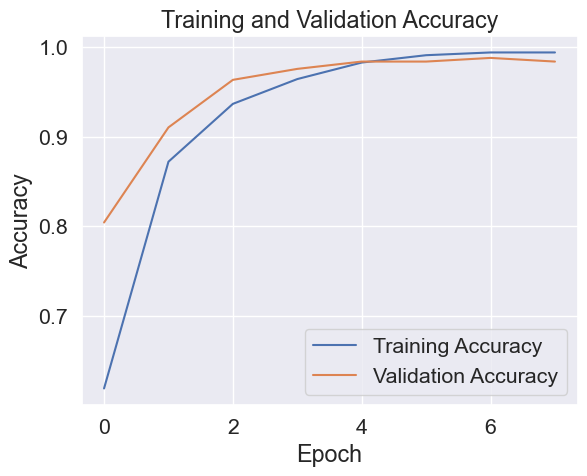

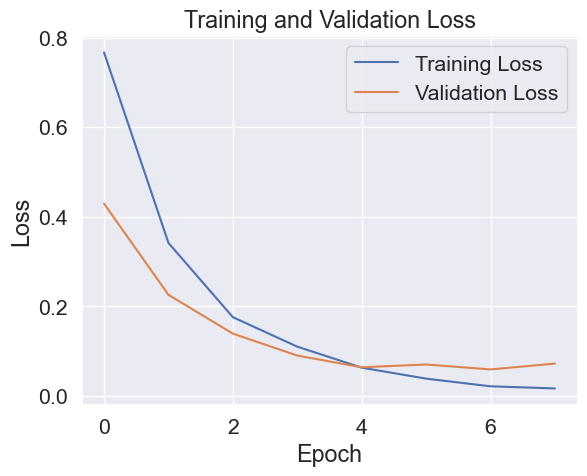

In [28]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming y_true contains true labels and y_pred contains predicted labels
y_true = [0, 1, 0, 1]
y_pred = [0, 1, 1, 1]

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_true, y_pred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_true, y_pred)
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_true, y_pred)
print("F1 Score:", f1)


Accuracy: 0.75
Precision: 0.6666666666666666
Recall: 1.0
F1 Score: 0.8


In [30]:
from sklearn.metrics import classification_report
print("\n Classification report : \n {}".format(classification_report(test_labels, pred_labels)))
print("\n Accuracy  : %.2f%%" %(100*(accuracy_score(test_labels, pred_labels))))
print("\n Precision : %.2f%%" %(100*(precision_score(test_labels, pred_labels))))
print("\n Recall    : %.2f%%" %(100*(recall_score(test_labels, pred_labels))))
print("\n F1 Score  : %.2f%%" %(100*(f1_score(test_labels, pred_labels))))


 Classification report : 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       826
           1       1.00      0.98      0.99       395

    accuracy                           1.00      1221
   macro avg       1.00      0.99      0.99      1221
weighted avg       1.00      1.00      1.00      1221


 Accuracy  : 99.51%

 Precision : 100.00%

 Recall    : 98.48%

 F1 Score  : 99.23%


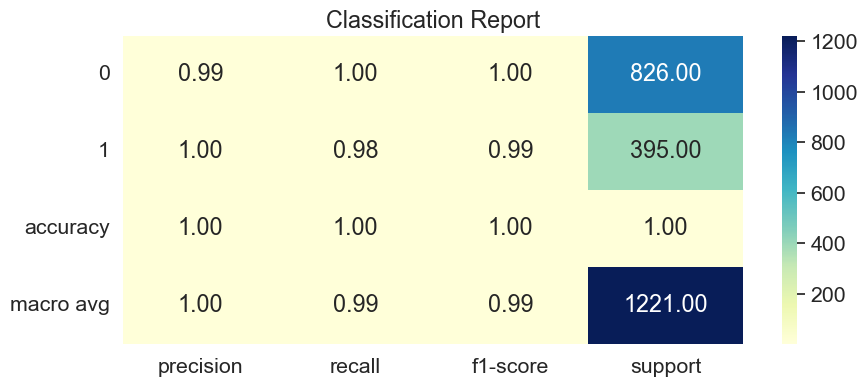

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Assuming test_labels and pred_labels are available

# Generate classification report
report = classification_report(test_labels, pred_labels, output_dict=True)

# Convert the classification report to a DataFrame
report_df = pd.DataFrame(report).transpose()

# Plotting the heatmap
plt.figure(figsize=(10, 4))
sns.heatmap(report_df.iloc[:-1, :].astype(float), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('Classification Report')
plt.show()


In [32]:
model.save_weights("model_vgg.weights.h5")
print("Saved model to disk")

Saved model to disk


In [33]:
model_json=model.to_json()
with open("model_vgg.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import filedialog
import numpy as np
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Dense
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import filedialog
import numpy as np
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json
import tensorflow as tf
from flask import Flask, render_template, request, send_from_directory

app = Flask(__name__)


UPLOAD_FOLDER = "uploads"
STATIC_FOLDER = "static"
json_file = open('model_vgg.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
cnn_model = model_from_json(loaded_model_json)
# load weights into new model
cnn_model.load_weights("model_vgg.h5")
# Load model

IMAGE_SIZE = 150

# Preprocess an image
def preprocess_image(image):
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [IMAGE_SIZE, IMAGE_SIZE])
    image /= 255.0  # normalize to [0,1] range

    return image


# Read the image from path and preprocess
def load_and_preprocess_image(path):
    image = tf.io.read_file(path)

    return preprocess_image(image)


# Predict & classify image
# Predict & classify image
def classify(model, image_path):
    preprocessed_image = load_and_preprocess_image(image_path)
    preprocessed_image = tf.reshape(preprocessed_image, (1, IMAGE_SIZE, IMAGE_SIZE, 3))

    prob = cnn_model.predict(preprocessed_image)[0]
    print(prob)

    # Get the index of the maximum probability
    predicted_label_index = np.argmax(prob)

    # Mapping index to label name
    label_names = [ 'tumor', 'normal' ]
    # Replace with your actual label names

    label = label_names[predicted_label_index]

    classified_prob = prob[predicted_label_index]

    return label, classified_prob



# home page
@app.route("/")
def home():
    return render_template("home.html")


@app.route("/classify", methods=["POST", "GET"])
def upload_file():

    if request.method == "GET":
        return render_template("home.html")

    else:
        file = request.files["image"]
        upload_image_path = os.path.join(UPLOAD_FOLDER, file.filename)
        print(upload_image_path)
        file.save(upload_image_path)

        label, prob = classify(cnn_model, upload_image_path)

        prob = round((prob * 100), 2)

    return render_template(
        "classify.html", image_file_name=file.filename, label=label, prob=prob
    )


@app.route("/classify/<filename>")
def send_file(filename):
    return send_from_directory(UPLOAD_FOLDER, filename)


if __name__ == "__main__":

    app.run()



 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [26/Mar/2024 12:14:01] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [26/Mar/2024 12:14:01] "GET /static/images/brain.jpeg HTTP/1.1" 304 -
127.0.0.1 - - [26/Mar/2024 12:14:01] "GET /static/script.js HTTP/1.1" 304 -


uploads\gg (2).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


127.0.0.1 - - [26/Mar/2024 12:14:08] "POST /classify HTTP/1.1" 200 -
127.0.0.1 - - [26/Mar/2024 12:14:08] "GET /classify/gg%20(2).jpg HTTP/1.1" 200 -
127.0.0.1 - - [26/Mar/2024 12:14:08] "GET /static/script.js HTTP/1.1" 304 -
127.0.0.1 - - [26/Mar/2024 12:14:08] "GET /static/images/brain.jpeg HTTP/1.1" 304 -


[9.9658895e-01 3.4110812e-03 7.4740303e-10 3.6171222e-10]


127.0.0.1 - - [26/Mar/2024 12:14:11] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [26/Mar/2024 12:14:11] "GET /static/images/brain.jpeg HTTP/1.1" 304 -
127.0.0.1 - - [26/Mar/2024 12:14:11] "GET /static/script.js HTTP/1.1" 304 -


uploads\image (18).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


127.0.0.1 - - [26/Mar/2024 12:14:22] "POST /classify HTTP/1.1" 200 -
127.0.0.1 - - [26/Mar/2024 12:14:22] "GET /classify/image%20(18).jpg HTTP/1.1" 200 -
127.0.0.1 - - [26/Mar/2024 12:14:22] "GET /static/script.js HTTP/1.1" 304 -
127.0.0.1 - - [26/Mar/2024 12:14:22] "GET /static/images/brain.jpeg HTTP/1.1" 304 -


[8.0902733e-05 9.9991906e-01 6.7001561e-12 2.5615831e-11]


127.0.0.1 - - [26/Mar/2024 12:14:24] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [26/Mar/2024 12:14:24] "GET /static/images/brain.jpeg HTTP/1.1" 304 -
127.0.0.1 - - [26/Mar/2024 12:14:24] "GET /static/script.js HTTP/1.1" 304 -
